# **Student Training Prorgam on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

# Gradient Descent: A Quick Recap

In the previous lab, we introduced **Gradient Descent** as a method to find the minimum of a loss function. It is the core optimization algorithm that powers a vast majority of **Machine Learning** and **Deep Learning** models.

---

### A Quick Recap of the Algorithm

The core idea of **Gradient Descent** is to iteratively take steps in the direction of the steepest descent of a function (our loss function) to find its minimum.

1. Start with a random initialization of the solution (model parameters or weights).
2. Incrementally change the solution by moving in the direction of the **negative gradient** of the loss function.
3. Repeat the previous step until some convergence criteria is met.

---

The key update equation for a weight or parameter ($w$) is:

$$
w_{k+1} \leftarrow w_k - \eta \nabla J
$$

Where:
- $w_k$ is the current weight.
- $\eta$ is the **learning rate**.
- $\nabla J$ is the **gradient of the loss function** $J$.


In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


### Setting up the Environment and Data

First, let's import the necessary libraries and set a random seed for reproducibility.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

## Creating the Data

We'll generate some synthetic data that follows a **linear pattern**. Our true linear equation will be:

$$
y = 4 + 3x
$$

We will also add some **random noise** to the y values to simulate real-world data, which is rarely perfect.

Let's generate the data with:
- `y0 = 4` (intercept)
- `y1 = 3` (slope)

and add some noise to the data.


In [ ]:
# We are creating data based on the equation y = 4 + 3x + noise

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Here, np.random.rand(100, 1) creates 100 random numbers between 0 and 1. Multiplying by 2 scales this to be between 0 and 2. np.random.randn(100, 1) adds Gaussian noise (random fluctuations) to our y values.

Let's also plot the data we just created

Text(0, 0.5, 'y')

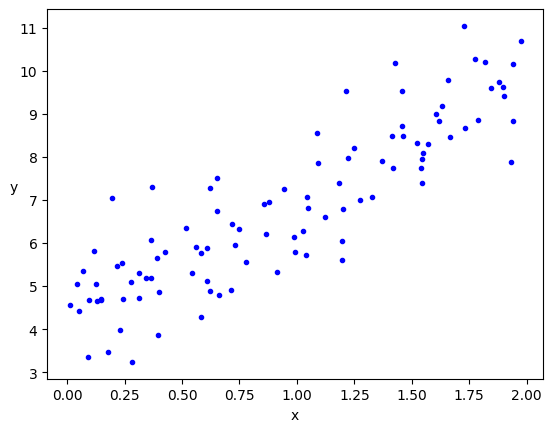

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

Our goal is to use Gradient Descent to find the original parameters (intercept = 4, slope = 3) just by looking at this scattered data.

## The Cost Function for Linear Regression

Before we can optimize, we need to define how we measure error. For **Linear Regression**, we use the **Mean Squared Error (MSE)** cost function. It measures the average squared difference between the model's predictions and the actual values.

The equation for the MSE cost function $J$ is:

$$
J(\theta) = \frac{1}{2m}  \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

Where:
- $m$ is the number of training examples.
- $\theta$ is our vector of model parameters (in our case, the intercept and the slope).
- $h_\theta(x^{(i)})$ is the prediction for the $i$-th example.
- $y^{(i)}$ is the true label for the $i$-th example.

The $\frac{1}{2}$ is included for convenience, as it simplifies the derivative calculation.


In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## The Gradient of the Cost Function

To use **Gradient Descent**, we need the partial derivatives of the cost function with respect to each parameter \(\theta_j\).

The general form of the gradient for **Linear Regression** is:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

For our problem with one feature \(x\) and an intercept, we have two parameters: \(\theta_0\) (intercept) and \(\theta_1\) (slope). The updates will be:

$$
\theta_0 := \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)
$$

$$
\theta_1 := \theta_1 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_1^{(i)}
$$

This can be written in a compact, **vectorized form**:

$$
\nabla J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$


### Variant 1: Batch Gradient Descent

**Batch Gradient Descent** is the simplest variant. In each step, it calculates the gradient using the **entire training dataset**.

**Pros:**
- The convergence path is smooth and stable because the gradient is a true average over all data.

**Cons:**
- It is very slow and computationally expensive for large datasets.


In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of parameters (theta)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        # Calculate prediction: prediction = X . theta
        prediction = np.dot(X, y_pred)

        # Update parameters: theta = theta - (1/m) * learning_rate * (X^T . (prediction - y))
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))

        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

### Running Batch Gradient Descent

Let's run this for **1000 iterations** with a learning rate of **0.01**. We start with a random guess for our parameters (`y_pred`).

**Our model** is:
$$
y = \theta_0 + \theta_1 x
$$

**A crucial step:**
To handle the intercept term $\theta_0$ using matrix multiplication, we add a "dummy" feature $x_0 = 1$ to all our input samples. This is known as the **bias trick**.


In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


The learned parameters (3.903, 3.046) are very close to our original true values (4, 3)!

### Visualizing the Loss

Let's plot the error at each iteration. This is our "descent down the mountain".

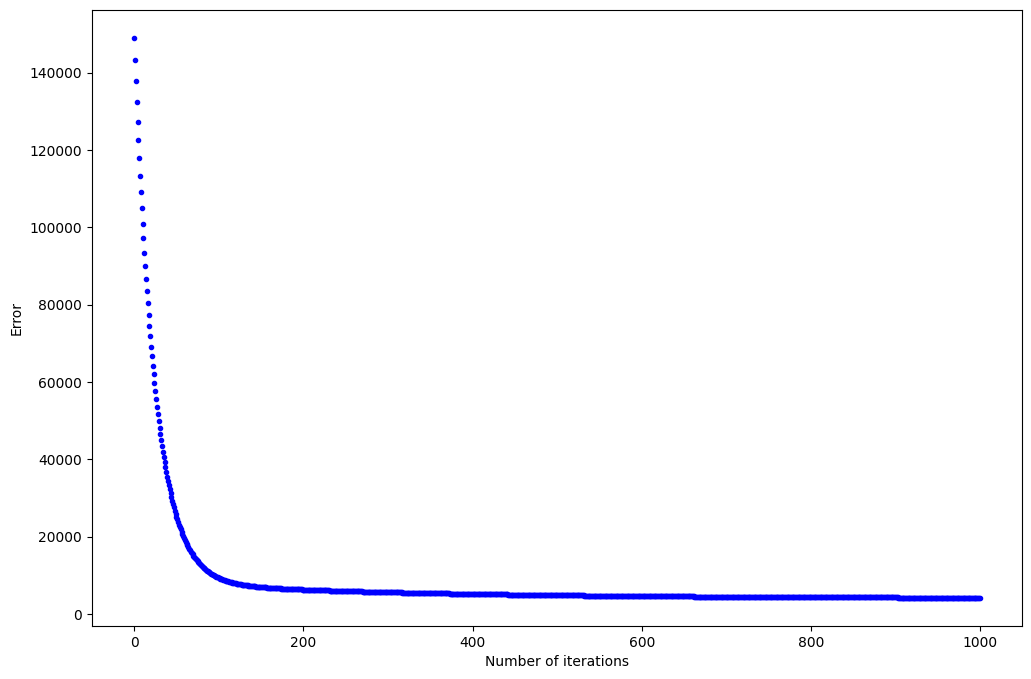

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in on the first 200 iterations shows how the error drops rapidly at first and then slows down as it approaches the minimum.

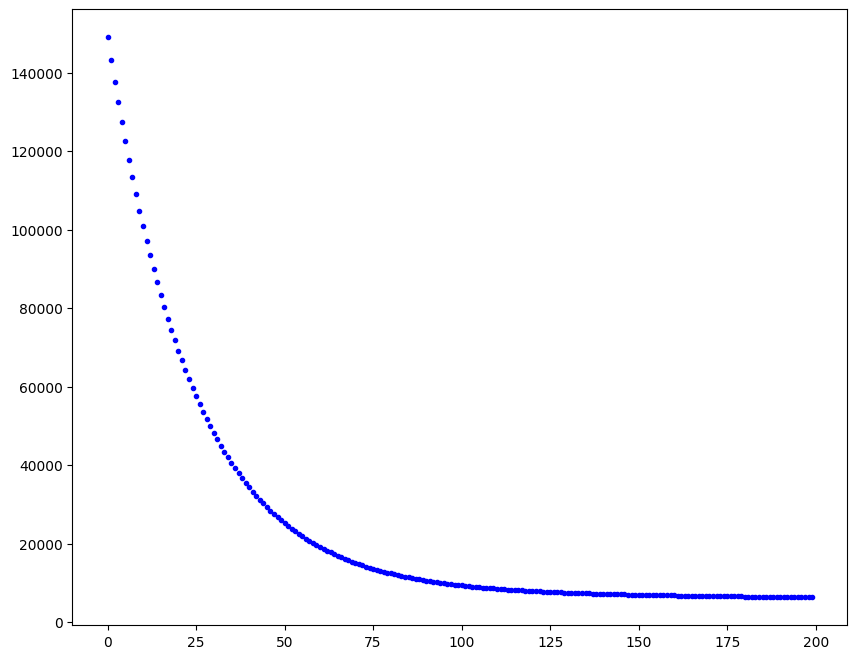

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

The smooth curve is characteristic of Batch Gradient Descent.

### Variant 2: Stochastic Gradient Descent (SGD)

**Batch GD** is inefficient for large datasets. **SGD** addresses this by taking a gradient step based on **only one randomly chosen training example at a time**.

**Pros:**
- Extremely fast per step.
- Can help escape shallow local minima due to its random nature.

**Cons:**
- The path to the minimum is very noisy and erratic.
- It never truly "settles" at the minimum but bounces around it.


In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

Let's run SGD. Note that it requires a much higher learning rate and fewer epochs (passes over the data) to converge.

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


Again, the parameters are close to the true values, but notice the final error is higher and the parameters are slightly less accurate. This is due to the noisy nature of SGD.


### Visualizing the Loss

The loss curve for SGD is much more erratic.

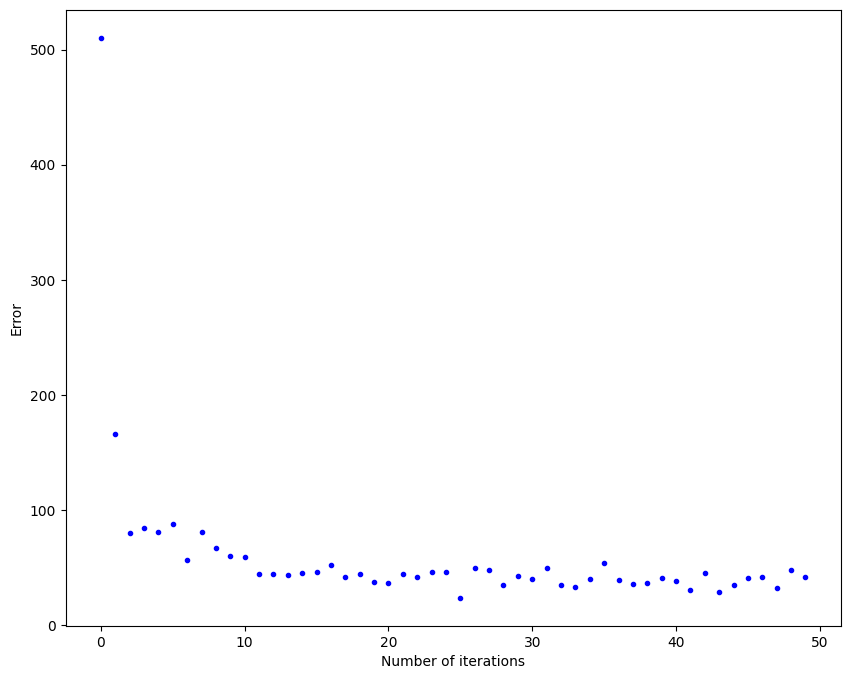

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

### Variant 3: Mini-Batch Gradient Descent

**Mini-Batch GD** is the happy medium. It computes the gradient on a small, random subset of the data called a **mini-batch**.

**Pros:**
- A good balance between the stability of Batch GD and the speed of SGD.
- Allows for vectorized implementation, making it very efficient on modern hardware (like GPUs).

**Cons:**
- Introduces a new hyperparameter: the `batch_size`.

This is the **most common variant** used in deep learning today.


In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

Let's run it.

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


### Visualizing the Loss

The loss curve is less noisy than SGD but not as smooth as Batch GD.

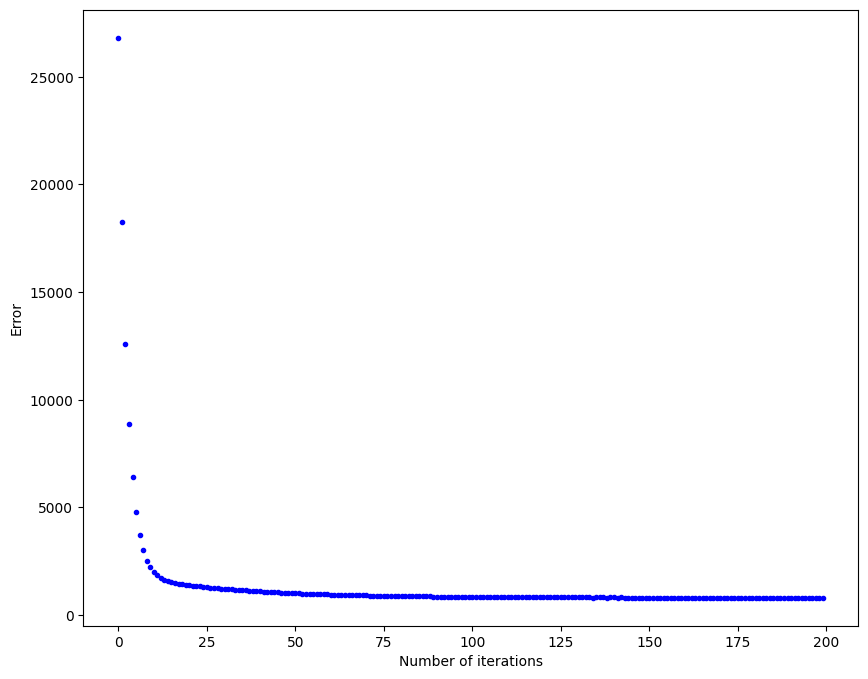

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

### Visual Comparison of the Learned Models

Let's re-run all three algorithms and plot their final learned lines on the original data. This will give us a better intuition for how they perform.

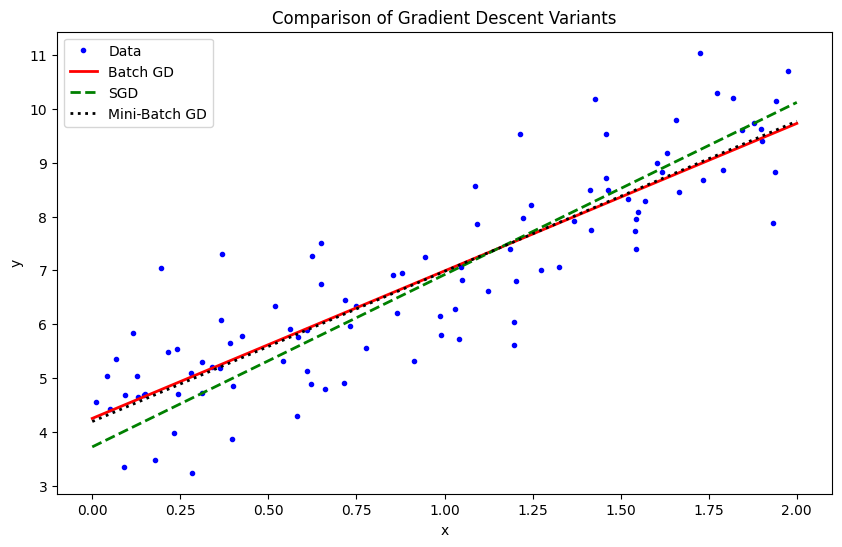

In [ ]:
# Rerun all three for comparison
# Batch
lr_batch = 0.1
n_iter_batch = 200
y_pred_batch_final, _, _ = gradient_descent(X_b, y, np.random.randn(2,1), lr_batch, n_iter_batch)

# SGD
lr_sgd = 0.05
n_iter_sgd = 200
y_pred_sgd_final, _ = stocashtic_gradient_descent(X_b, y, np.random.randn(2,1), lr_sgd, n_iter_sgd)

# Mini-Batch
lr_mini = 0.1
n_iter_mini = 200
y_pred_mini_final, _ = minibatch_gradient_descent(X, y, np.random.randn(2,1), lr_mini, n_iter_mini)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.', label='Data')
# Create a set of X values for plotting the lines
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
# Get predictions for the lines
y_predict_batch = X_new_b.dot(y_pred_batch_final)
y_predict_sgd = X_new_b.dot(y_pred_sgd_final)
y_predict_mini = X_new_b.dot(y_pred_mini_final)

plt.plot(X_new, y_predict_batch, 'r-', linewidth=2, label='Batch GD')
plt.plot(X_new, y_predict_sgd, 'g--', linewidth=2, label='SGD')
plt.plot(X_new, y_predict_mini, 'k:', linewidth=2, label='Mini-Batch GD')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Gradient Descent Variants')
plt.legend()
plt.show()

As you can see, all three methods find a very good fit to the data. While their training dynamics (the loss curves) are very different, they all achieve the same goal.

### Things to Try Out

1. **Change batch size in mini-batch gradient descent:**
   Try a small size (e.g., `2`) and a large size (e.g., `80`). How does the loss curve change? What happens when the batch size equals the total number of samples?

2. **Test on real datasets:**
   Use a dataset from `sklearn.datasets`, like the **Boston Housing** or **Diabetes** datasets, and see how each variant performs.

3. **Compare learning rates:**
   Test the effects of changing the learning rate. Try a very high and a very low learning rate for each of the three variants. Which one is most sensitive to the learning rate?

4. **Implement a learning rate schedule for SGD:**
   Instead of a fixed learning rate, make it decrease over time (e.g., `lr = initial_lr / (epoch + 1)`). How does this affect the final error and the stability of the loss curve?


1. **Change batch size in mini-batch gradient descent:**
   Try a small size (e.g., `2`) and a large size (e.g., `80`). How does the loss curve change? What happens when the batch size equals the total number of samples?

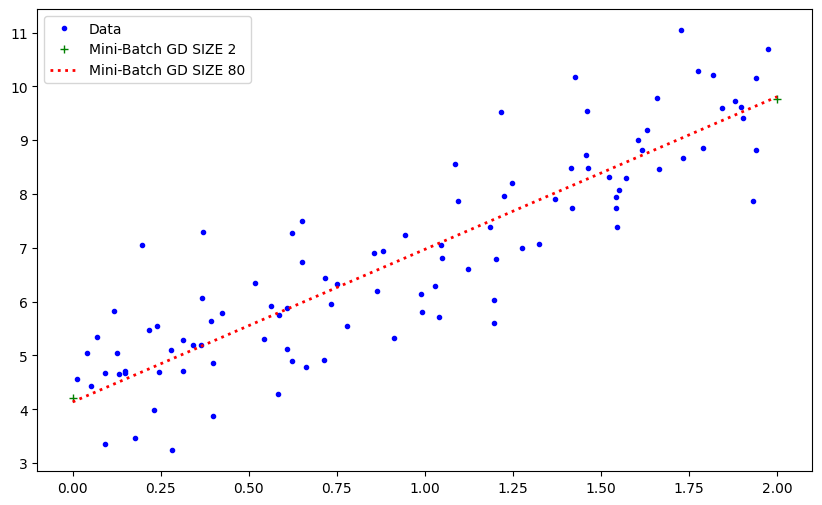

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

# Mini-Batch
lr_mini = 0.1
n_iter_mini = 200
y_pred_mini_final_2, _ = minibatch_gradient_descent(X, y, np.random.randn(2,1), lr_mini, n_iter_mini,2)
y_pred_mini_final_80, _ = minibatch_gradient_descent(X, y, np.random.randn(2,1), lr_mini, n_iter_mini,10)

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.', label='Data')
# Create a set of X values for plotting the lines
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
# Get predictions for the lines
# y_predict_batch = X_new_b.dot(y_pred_batch_final)
# y_predict_sgd = X_new_b.dot(y_pred_sgd_final)
y_predict_mini_2 = X_new_b.dot(y_pred_mini_final_2)
y_predict_mini_80 = X_new_b.dot(y_pred_mini_final_80)
# y_predict_mini = X_new_b.dot(y_pred_mini_final)

# plt.plot(X_new, y_predict_batch, 'r-', linewidth=2, label='Batch GD')
# plt.plot(X_new, y_predict_sgd, 'g--', linewidth=2, label='SGD')

# plt.plot(X_new, y_predict_mini_2, 'k+', linewidth=2)
plt.plot(X_new, y_predict_mini_2, 'g+', linewidth=2, label='Mini-Batch GD SIZE 2')
plt.plot(X_new, y_predict_mini_80, 'r:', linewidth=2, label='Mini-Batch GD SIZE 80')
0
plt.legend()
plt.show()


Mini-batch size affects the convergence path and stability, but for convex problems like linear regression, the final solution is approximately the same.

**Test on real datasets:**
2.   Use a dataset from `sklearn.datasets`, like the **Boston Housing** or **Diabetes** datasets, and see how each variant performs.


### Since Boston Data set deleted from sklearn , i used california housing dataset


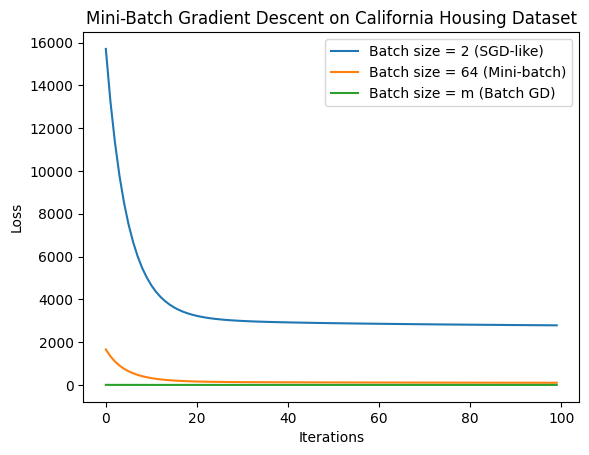

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset (Boston replacement)
X, y = fetch_california_housing(return_X_y=True)
y = y.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Cost function
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    return (1/(2*m)) * np.sum((predictions - y)**2)

# Mini-batch Gradient Descent (UNCHANGED logic)
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100, batch_size=32):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = X_i.dot(y_pred)

            y_pred = y_pred - (1/m) * learning_rate * X_i.T.dot(prediction - y_i)
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Hyperparameters
lr = 0.1
iters = 100
m = len(y)
n_features = X.shape[1]

# Run different GD variants
_, cost_bs2 = minibatch_gradient_descent(
    X, y, np.random.randn(n_features+1, 1), lr, iters, batch_size=2
)

_, cost_bs64 = minibatch_gradient_descent(
    X, y, np.random.randn(n_features+1, 1), lr, iters, batch_size=64
)

_, cost_full = minibatch_gradient_descent(
    X, y, np.random.randn(n_features+1, 1), lr, iters, batch_size=m
)

# Plot loss curves
plt.figure()
plt.plot(cost_bs2, label="Batch size = 2 (SGD-like)")
plt.plot(cost_bs64, label="Batch size = 64 (Mini-batch)")
plt.plot(cost_full, label="Batch size = m (Batch GD)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Mini-Batch Gradient Descent on California Housing Dataset")
plt.legend()
plt.show()


3. **Compare learning rates:**
   Test the effects of changing the learning rate. Try a very high and a very low learning rate for each of the three variants. Which one is most sensitive to the learning rate?


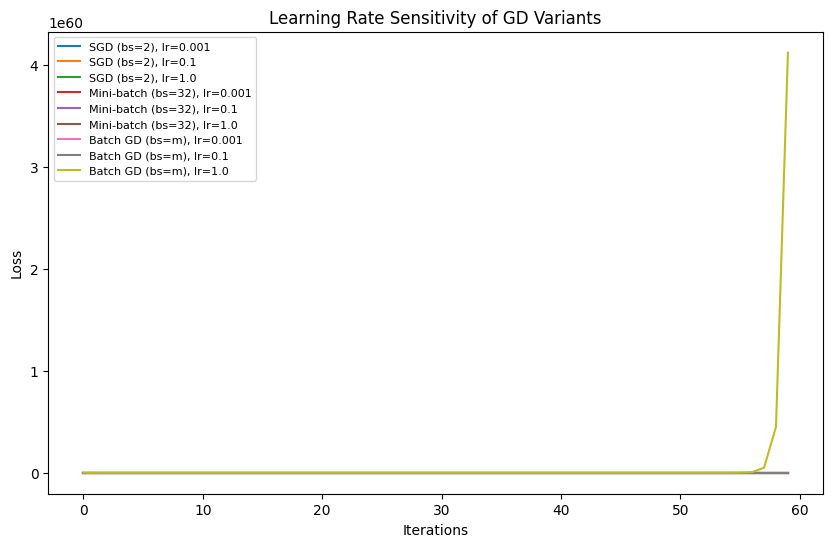

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# -------------------- Load Dataset --------------------
X, y = load_diabetes(return_X_y=True)
y = y.reshape(-1, 1)

X = StandardScaler().fit_transform(X)

# -------------------- Cost Function --------------------
def cal_cost(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

# -------------------- Mini-batch GD (UNCHANGED) --------------------
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=50, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = X_i.dot(y_pred)

            y_pred = y_pred - (1/m) * learning_rate * X_i.T.dot(prediction - y_i)
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# -------------------- Experiments --------------------
learning_rates = [0.001, 0.1, 1.0]   # low, good, high
iterations = 60
m = len(y)
n = X.shape[1]

variants = {
    "SGD (bs=2)": 2,
    "Mini-batch (bs=32)": 32,
    "Batch GD (bs=m)": m
}

plt.figure(figsize=(10,6))

for name, bs in variants.items():
    for lr in learning_rates:
        _, cost = minibatch_gradient_descent(
            X, y, np.random.randn(n+1, 1),
            learning_rate=lr,
            iterations=iterations,
            batch_size=bs
        )
        plt.plot(cost, label=f"{name}, lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Learning Rate Sensitivity of GD Variants")
plt.legend(fontsize=8)
plt.show()



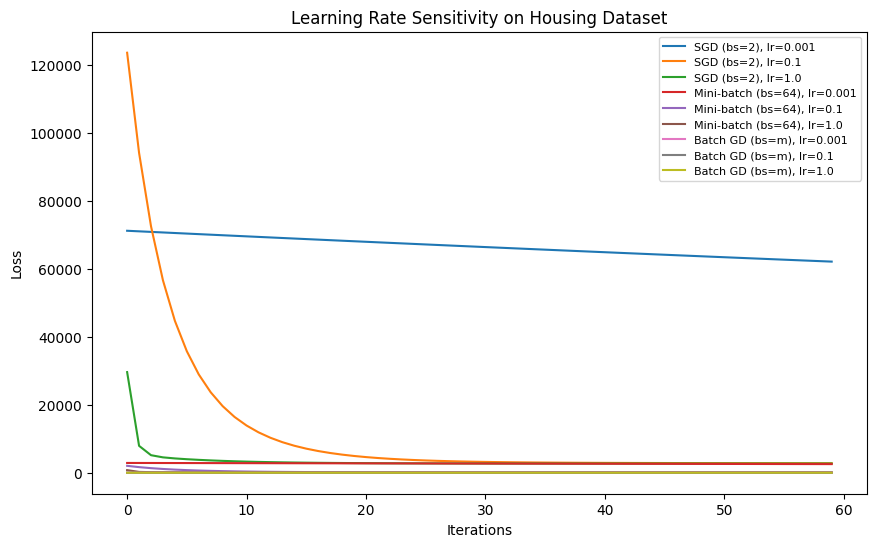

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# -------------------- Load Housing Dataset --------------------
X, y = fetch_california_housing(return_X_y=True)
y = y.reshape(-1, 1)

X = StandardScaler().fit_transform(X)

# -------------------- Cost Function --------------------
def cal_cost(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

# -------------------- Mini-batch Gradient Descent (UNCHANGED) --------------------
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=60, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = X_i.dot(y_pred)

            y_pred = y_pred - (1/m) * learning_rate * X_i.T.dot(prediction - y_i)
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# -------------------- Experiments --------------------
learning_rates = [0.001, 0.1, 1.0]
iterations = 60
m = len(y)
n = X.shape[1]

variants = {
    "SGD (bs=2)": 2,
    "Mini-batch (bs=64)": 64,
    "Batch GD (bs=m)": m
}

plt.figure(figsize=(10,6))

for name, bs in variants.items():
    for lr in learning_rates:
        _, cost = minibatch_gradient_descent(
            X, y,
            np.random.randn(n+1, 1),
            learning_rate=lr,
            iterations=iterations,
            batch_size=bs
        )
        plt.plot(cost, label=f"{name}, lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Learning Rate Sensitivity on Housing Dataset")
plt.legend(fontsize=8)
plt.show()


When the learning rate is very low, all three gradient descent variants converge slowly because parameter updates are too small. With a moderate learning rate, convergence is faster and stable for all methods. However, with a very high learning rate, the loss diverges due to overshooting the minimum. Among the three, SGD (small batch size) is the most sensitive to the learning rate because its gradients have high variance, while batch gradient descent is the least sensitive since it uses the full dataset and produces stable updates.

4.


/tmp/ipython-input-2229058593.py:14: RuntimeWarning: overflow encountered in square
  return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)


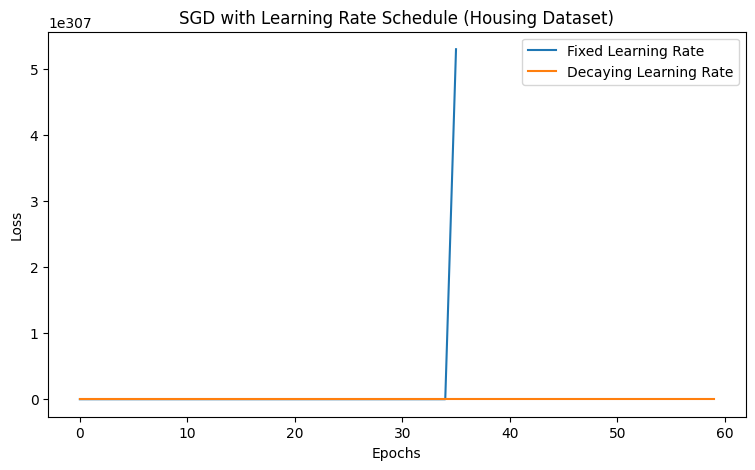

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# -------------------- Load Dataset --------------------
X, y = fetch_california_housing(return_X_y=True)
y = y.reshape(-1, 1)
X = StandardScaler().fit_transform(X)

# -------------------- Cost Function --------------------
def cal_cost(theta, X, y):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

# -------------------- SGD with optional LR schedule --------------------
def sgd(X, y, theta, initial_lr=0.1, epochs=60, use_schedule=False):
    m = len(y)
    cost_history = np.zeros(epochs)

    for epoch in range(epochs):
        lr = initial_lr / (epoch + 1) if use_schedule else initial_lr
        cost = 0.0

        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(m):   # batch size = 1 (pure SGD)
            X_i = np.c_[np.ones(1), X[i].reshape(1, -1)] # Fixed: Ensure bias term is 1-row array
            y_i = y[i].reshape(1, 1)

            prediction = X_i.dot(theta)
            theta = theta - lr * X_i.T.dot(prediction - y_i)
            cost += cal_cost(theta, X_i, y_i)

        cost_history[epoch] = cost

    return theta, cost_history

# -------------------- Run Experiments --------------------
epochs = 60
n = X.shape[1]

_, cost_fixed = sgd(
    X, y, np.random.randn(n+1, 1),
    initial_lr=0.01, # Reduced learning rate
    epochs=epochs,
    use_schedule=False
)

_, cost_scheduled = sgd(
    X, y, np.random.randn(n+1, 1),
    initial_lr=0.01, # Reduced learning rate
    epochs=epochs,
    use_schedule=True
)

# -------------------- Plot --------------------
plt.figure(figsize=(9,5))
plt.plot(cost_fixed, label="Fixed Learning Rate")
plt.plot(cost_scheduled, label="Decaying Learning Rate")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD with Learning Rate Schedule (Housing Dataset)")
plt.legend()
plt.show()

Using a learning rate schedule in SGD improves stability by reducing the step size over time. While a fixed learning rate causes noisy updates and oscillations near the minimum, a decaying learning rate allows large steps initially for fast learning and smaller steps later for fine convergence. As a result, the loss curve becomes smoother and the final error is usually lower when a learning rate schedule is applied.

## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

### Answer



The correct statement is (iii).

**Explanation:**

* A convex loss function has a single minimum, which is the global minimum (like a perfect bowl).

* Batch Gradient Descent calculates the true gradient of the entire dataset. With a suitable learning rate, it will take determined, non-random steps directly towards the minimum. It is therefore guaranteed to converge to the global optimum of a convex function.

* Stochastic Gradient Descent uses a single random point to estimate the gradient. This estimate is noisy and does not point directly at the minimum. Because of this randomness, SGD will not converge to the exact minimum point but will instead perpetually bounce around in the vicinity of the minimum. To make it converge, one typically has to use a learning rate schedule that slowly decreases the learning rate to zero.

* Statements (i) and (ii) are too strong; they don't specify the type of loss function. For a non-convex function (with many local minima), neither is guaranteed to find the global optimum. They might get stuck in a local minimum.

* **Therefore**, for a convex problem, Batch GD is guaranteed to find the optimum, while standard SGD is not guaranteed to land precisely on it.